# WinoAPH_Climate
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "Output/wine_cleaned_location.csv"


## Generate Province & Variety Lists

In [21]:
df = pd.read_csv(output_data_file)
climate_df= df.drop(columns=['description', 'price', 'taster_name', 'taster_twitter_handle', 'title'])
#grouped_global_data = climate_df.groupby(['country', 'province'])
climate_df.head()

,country,points,province,region_1,variety,winery,Wine_Year,latitude,longitude
0,Italy,87,Sicily & Sardinia,Etna,White Blend,Nicosia,2013,37.599994,14.015356
1,Portugal,87,Douro,NaN,Portuguese Red,Quinta dos Avidagos,2011,41.501277,-5.512293
2,US,87,Oregon,Willamette Valley,Pinot Gris,Rainstorm,2013,43.804133,-120.554201
3,US,87,Michigan,Lake Michigan Shore,Riesling,St. Julian,2013,44.314844,-85.602364
4,US,87,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,2012,43.804133,-120.554201


In [22]:
climate_df['Temperature'] = ""
climate_df['Humidity'] = ""

wine_climate_df = climate_df[["country", "province", "latitude", "longitude","points","variety","Temperature", "Humidity"]]

#first filter = unique province

wine_grouping = pd.DataFrame(wine_climate_df)
wine_grouping.drop_duplicates(subset='province', keep='first', inplace=True)
wine_dedup = pd.DataFrame(wine_grouping)

#second filter = top 2 varieties

top2varieties_raw = wine_climate_df.loc[wine_climate_df['variety'].isin(['Pinot Noir', 'Chardonnay'])]
top2_grouping = pd.DataFrame(top2varieties_raw)
top2_grouping.drop_duplicates(subset='province', keep='first', inplace=True)
top2_dedup = pd.DataFrame(top2_grouping)

top2_dedup

,country,province,latitude,longitude,points,variety,Temperature,Humidity
4,US,Oregon,43.804133,-120.554201,87,Pinot Noir,,
14,US,California,36.778261,-119.417932,87,Chardonnay,,
58,Chile,Maipo Valley,-33.808844,-70.764424,85,Pinot Noir,,
65,France,Burgundy,47.052505,4.383722,86,Chardonnay,,
70,US,Washington,47.751074,-120.740139,86,Chardonnay,,
...,...,...,...,...,...,...,...,...
124073,Portugal,Távora-Varosa,NaN,NaN,90,Pinot Noir,,
124731,Israel,Shomron,32.422877,35.302723,86,Chardonnay,,
125831,South Africa,Darling,-33.375584,18.386065,87,Chardonnay,,
129170,South Africa,Swartland,-33.330683,18.712579,86,Chardonnay,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the province number and province name).


In [23]:
results =[]
units = "imperial"
# loops for creating dataframe columns
print("------------------------------\nBeginning Data Retrieval\n------------------------------")

for index, row in wine_dedup.iterrows(): 
    try:
        lat, lon = row['latitude'], row['longitude']
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units={units}&APPID={weather_api_key}"
        response = requests.get(query).json()      
        wine_dedup.loc[index, 'Temperature'] = response['main']['temp']
        wine_dedup.loc[index, 'Humidity'] = response['main']['humidity']
        record_num += 1
        print(f"Processing Record {record_num} of Set {record_set} | {row['province']}") 
    except (KeyError, IndexError):
        print("City not found. Skipping...")
          
print("------------------------------\nData Retrieval Complete\n------------------------------")

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 402 of Set 1 | Sicily & Sardinia
Processing Record 403 of Set 1 | Douro
Processing Record 404 of Set 1 | Oregon
Processing Record 405 of Set 1 | Michigan
Processing Record 406 of Set 1 | Northern Spain
Processing Record 407 of Set 1 | Alsace
Processing Record 408 of Set 1 | Rheinhessen
Processing Record 409 of Set 1 | California
Processing Record 410 of Set 1 | Mosel
City not found. Skipping...
Processing Record 411 of Set 1 | Mendoza Province
Processing Record 412 of Set 1 | Virginia
Processing Record 413 of Set 1 | Beaujolais
Processing Record 414 of Set 1 | Colchagua Valley
Processing Record 415 of Set 1 | Southern Italy
Processing Record 416 of Set 1 | Maule Valley
Processing Record 417 of Set 1 | Bordeaux
Processing Record 418 of Set 1 | Maipo Valley
Processing Record 419 of Set 1 | Washington
Processing Record 420 of Set 1 | Central Italy
Processing Record 421 of Set 1 | Champ

Processing Record 582 of Set 1 | Nelson
Processing Record 583 of Set 1 | Waipara Valley
Processing Record 584 of Set 1 | Constantia
Processing Record 585 of Set 1 | Arizona
Processing Record 586 of Set 1 | Pinto Bandeira
Processing Record 587 of Set 1 | Primorska
Processing Record 588 of Set 1 | Moldova
Processing Record 589 of Set 1 | Uruguay
Processing Record 590 of Set 1 | Zenata
Processing Record 591 of Set 1 | South Africa
Processing Record 592 of Set 1 | Massachusetts
Processing Record 593 of Set 1 | Ohio
Processing Record 594 of Set 1 | Ica
Processing Record 595 of Set 1 | San Vicente
Processing Record 596 of Set 1 | Nashik
Processing Record 597 of Set 1 | Franschhoek
Processing Record 598 of Set 1 | South Island
Processing Record 599 of Set 1 | Atlantida
Processing Record 600 of Set 1 | Thracian Valley
Processing Record 601 of Set 1 | Tarnave
Processing Record 602 of Set 1 | Vipavska Dolina
Processing Record 603 of Set 1 | Bekaa Valley
Processing Record 604 of Set 1 | Elgin
Pro

Processing Record 761 of Set 1 | Goumenissa
Processing Record 762 of Set 1 | Portugal
Processing Record 763 of Set 1 | Messinia
Processing Record 764 of Set 1 | Lakonia
Processing Record 765 of Set 1 | Markopoulo
City not found. Skipping...
Processing Record 766 of Set 1 | Paardeberg
Processing Record 767 of Set 1 | San Antonio de las Minas Valley
Processing Record 768 of Set 1 | Krania Olympus
Processing Record 769 of Set 1 | Corinthia
Processing Record 770 of Set 1 | Slovenska Istra
City not found. Skipping...
Processing Record 771 of Set 1 | Gladstone
Processing Record 772 of Set 1 | Jerusalem Hills
Processing Record 773 of Set 1 | Mount Athos
Processing Record 774 of Set 1 | Colares
Processing Record 775 of Set 1 | Helderberg
Processing Record 776 of Set 1 | Casablanca & Leyda Valleys
Processing Record 777 of Set 1 | Dealurile Hușilor
Processing Record 778 of Set 1 | Urla-Thrace
Processing Record 779 of Set 1 | Südburgenland
Processing Record 780 of Set 1 | Cape Peninsula
Processin

In [24]:
results =[]
record_num = 0
record_set = 1
units = "imperial"
# loops for creating dataframe columns
print("------------------------------\nBeginning Data Retrieval\n------------------------------")

for index, row in top2_dedup.iterrows(): 
    try:
        lat, lon = row['latitude'], row['longitude']
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units={units}&APPID={weather_api_key}"
        response = requests.get(query).json()      
        top2_dedup.loc[index, 'Temperature'] = response['main']['temp']
        top2_dedup.loc[index, 'Humidity'] = response['main']['humidity']
        record_num += 1
        print(f"Processing Record {record_num} of Set {record_set} | {row['province']}") 
    except (KeyError, IndexError):
        print("City not found. Skipping...")
          
print("------------------------------\nData Retrieval Complete\n------------------------------")

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Oregon
Processing Record 2 of Set 1 | California
Processing Record 3 of Set 1 | Maipo Valley
Processing Record 4 of Set 1 | Burgundy
Processing Record 5 of Set 1 | Washington
Processing Record 6 of Set 1 | South Australia
Processing Record 7 of Set 1 | Leyda Valley
Processing Record 8 of Set 1 | Casablanca Valley
Processing Record 9 of Set 1 | Western Cape
Processing Record 10 of Set 1 | Stellenbosch
Processing Record 11 of Set 1 | New York
City not found. Skipping...
Processing Record 12 of Set 1 | Recas
Processing Record 13 of Set 1 | Limarí Valley
Processing Record 14 of Set 1 | Colchagua Costa
Processing Record 15 of Set 1 | Rapel Valley
Processing Record 16 of Set 1 | Northeastern Italy
Processing Record 17 of Set 1 | Veneto
Processing Record 18 of Set 1 | Central Valley
Processing Record 19 of Set 1 | Lontué Valley
Processing Record 20 of Set 1 | Colchagua Valley


Processing Record 182 of Set 1 | Lolol Valley
Processing Record 183 of Set 1 | Massachusetts
Processing Record 184 of Set 1 | Ukraine
Processing Record 185 of Set 1 | Douro
Processing Record 186 of Set 1 | Alentejano
Processing Record 187 of Set 1 | Connecticut
City not found. Skipping...
Processing Record 188 of Set 1 | Shomron
Processing Record 189 of Set 1 | Darling
Processing Record 190 of Set 1 | Swartland
Processing Record 191 of Set 1 | Cape Peninsula
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#Clean dataframe to remove lon & lat that were not found
wine_dedup['Temperature'] = wine_dedup['Temperature'].replace('', np.nan)
wine_dedup = wine_dedup.dropna()

#Preview the dataframe & save to CSV
wine_dedup.to_csv("Output/top2_varieties.csv")
wine_dedup

,country,province,latitude,longitude,points,variety,Temperature,Humidity
0,Italy,Sicily & Sardinia,37.599994,14.015356,87,White Blend,65.48,100
1,Portugal,Douro,41.501277,-5.512293,87,Portuguese Red,53.58,81
2,US,Oregon,43.804133,-120.554201,87,Pinot Gris,44.58,34
3,US,Michigan,44.314844,-85.602364,87,Riesling,41.65,44
5,Spain,Northern Spain,43.336607,-3.202718,87,Tempranillo-Merlot,57.74,87
...,...,...,...,...,...,...,...,...
112079,Cyprus,Kathikas,34.913746,32.418411,87,Red Blend,58.75,67
112080,Greece,Vin de Pays de Velvendo,40.254548,22.074278,87,Red Blend,62.26,42
118065,Germany,Landwein Rhein,49.231335,8.386075,88,Riesling,64.65,54
121661,Greece,Lesbos,39.264509,26.277707,84,White Blend,64.40,63


In [26]:
#Grouping datasets
points_ct = (wine_dedup.groupby(['variety'])["points"].count())

variety_df = pd.DataFrame({"Total Count": points_ct, "Percentage of Variety": (points_ct / 401 *100)})

variety_df.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Variety":"{:.2f}%"})

,Total Count,Percentage of Variety
variety,,
Red Blend,35,8.73%
Sauvignon Blanc,26,6.48%
Chardonnay,24,5.99%
Cabernet Sauvignon,24,5.99%
Pinot Noir,21,5.24%
White Blend,18,4.49%
Riesling,11,2.74%
Portuguese Red,11,2.74%
Syrah,9,2.24%


In [27]:
#Clean dataframe to remove lon & lat that were not found
top2_dedup['Temperature'] = top2_dedup['Temperature'].replace('', np.nan)
top2_dedup = top2_dedup.dropna()

#Preview the dataframe & save to CSV
top2_dedup.to_csv("Output/top2_varieties.csv")
top2_dedup

,country,province,latitude,longitude,points,variety,Temperature,Humidity
4,US,Oregon,43.804133,-120.554201,87,Pinot Noir,44.58,34
14,US,California,36.778261,-119.417932,87,Chardonnay,61.83,100
58,Chile,Maipo Valley,-33.808844,-70.764424,85,Pinot Noir,78.19,57
65,France,Burgundy,47.052505,4.383722,86,Chardonnay,69.80,52
70,US,Washington,47.751074,-120.740139,86,Chardonnay,51.13,69
...,...,...,...,...,...,...,...,...
122555,US,Connecticut,41.603221,-73.087749,84,Chardonnay,58.59,43
124731,Israel,Shomron,32.422877,35.302723,86,Chardonnay,70.11,73
125831,South Africa,Darling,-33.375584,18.386065,87,Chardonnay,60.91,82
129170,South Africa,Swartland,-33.330683,18.712579,86,Chardonnay,61.72,92


In [60]:
#Grouping datasets
points_ct = (top2_dedup.groupby(['variety'])["points"].count())

variety_df = pd.DataFrame({"Total Count": points_ct, "Percentage of Variety": (points_ct / 191 *100)})

variety_df.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Variety":"{:.2f}%"})

,Total Count,Percentage of Variety
variety,,
Chardonnay,121,63.35%
Pinot Noir,70,36.65%


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### All Provinces - Temperature vs. Wine Score Plot
####  All Provinces - Humidity vs. Wine Score Plot
####  Pinot Noir - Temperature vs. Wine Score Plot
####  Pinot Noir - Humidity vs. Wine Score Plot
####  Chardonnay - Temperature vs. Wine Score Plot
####  Chardonnay - Humidity vs. Wine Score Plot

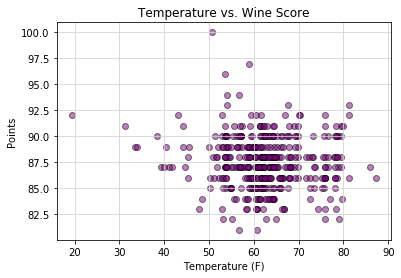

In [35]:
# Build a scatter plot for each data type
plt.scatter(wine_dedup["Temperature"],wine_dedup["points"],edgecolors="black",facecolors="purple", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Temperature vs. Wine Score')
plt.xlabel("Temperature (F)")
plt.ylabel("Points")
# Save & Show the figure
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

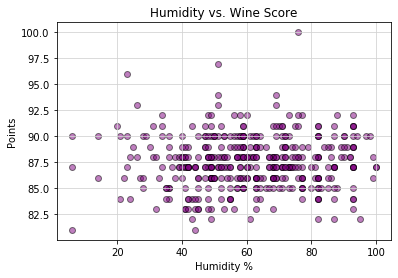

In [36]:
# Build a scatter plot for each data type
plt.scatter(wine_dedup["Humidity"],wine_dedup["points"],edgecolors="black",facecolors="purple", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Humidity vs. Wine Score')
plt.xlabel("Humidity %")
plt.ylabel("Points")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save & Show the figure
#plt.savefig("output_data/Latitude vs. Humidity.png")
plt.show()

In [58]:
####  Top 2 - Humidity vs. Wine Score Plot
pinot_noir = top2_dedup.loc[top2_dedup['variety'] == "Pinot Noir",:]
chardonnay_var = top2_dedup.loc[top2_dedup['variety'] == "Chardonnay",:]
chardonnay_var

,country,province,latitude,longitude,points,variety,Temperature,Humidity
14,US,California,36.778261,-119.417932,87,Chardonnay,61.83,100
65,France,Burgundy,47.052505,4.383722,86,Chardonnay,69.80,52
70,US,Washington,47.751074,-120.740139,86,Chardonnay,51.13,69
77,Australia,South Australia,-30.000232,136.209155,86,Chardonnay,67.82,65
103,Chile,Leyda Valley,-33.613157,-71.450184,87,Chardonnay,73.63,68
...,...,...,...,...,...,...,...,...
122555,US,Connecticut,41.603221,-73.087749,84,Chardonnay,58.59,43
124731,Israel,Shomron,32.422877,35.302723,86,Chardonnay,70.11,73
125831,South Africa,Darling,-33.375584,18.386065,87,Chardonnay,60.91,82
129170,South Africa,Swartland,-33.330683,18.712579,86,Chardonnay,61.72,92


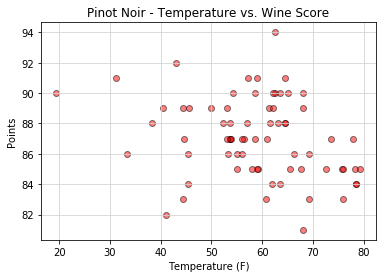

In [63]:
plt.scatter(pinot_noir["Temperature"],pinot_noir["points"],edgecolors="black",facecolors="red", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Pinot Noir - Temperature vs. Wine Score')
plt.xlabel("Temperature (F)")
plt.ylabel("Points")
# Save & Show the figure
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

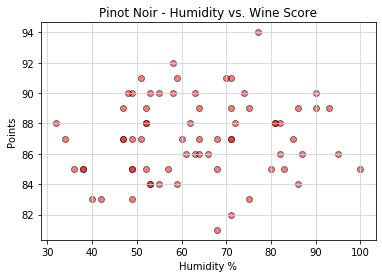

In [64]:
plt.scatter(pinot_noir["Humidity"],pinot_noir["points"],edgecolors="black",facecolors="red", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Pinot Noir - Humidity vs. Wine Score')
plt.xlabel("Humidity %")
plt.ylabel("Points")
# Save & Show the figure
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

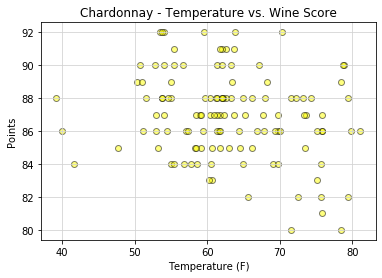

In [65]:
plt.scatter(chardonnay_var["Temperature"],chardonnay_var["points"],edgecolors="black",facecolors="yellow", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Chardonnay - Temperature vs. Wine Score')
plt.xlabel("Temperature (F)")
plt.ylabel("Points")
# Save & Show the figure
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

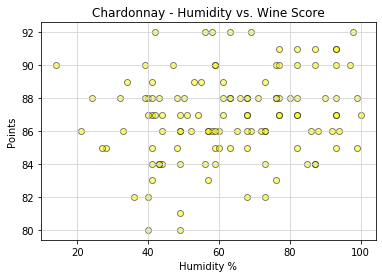

In [66]:
plt.scatter(chardonnay["Humidity"],chardonnay["points"],edgecolors="black",facecolors="yellow", alpha = .5)
# Incorporate the other graph properties
plt.title(f'Chardonnay - Humidity vs. Wine Score')
plt.xlabel("Humidity %")
plt.ylabel("Points")
# Save & Show the figure
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

## Linear Regression

####  All Varieties - Temperature vs. Wine Score Linear Regression
####  All Varieties - Humidity vs. Wine Score Linear Regression
####  Pinot Noir - Temperature vs. Wine Score Linear Regression
####  Pinot Noir - Humidity vs. Wine Score Linear Regression
####  Chardonnay - Temperature vs. Wine Score Linear Regression
####  Chardonnay - Humidity vs. Wine Score Linear Regression

Regression line equation is: y = -0.03x + 89.2
The r-squared is: -0.09471819548341502
The regression displays no correlation between data sets.


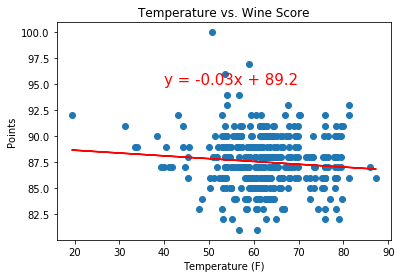

In [67]:
x_values = pd.to_numeric(wine_dedup["Temperature"]).astype(float)
y_values = pd.to_numeric(wine_dedup["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,95),fontsize=15,color="red")
plt.xlabel('Temperature (F)')
plt.ylabel('Points')
plt.title('Temperature vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()

Regression line equation is: y = 0.01x + 87.16
The r-squared is: 0.04316938473561902
The regression displays no correlation between data sets.


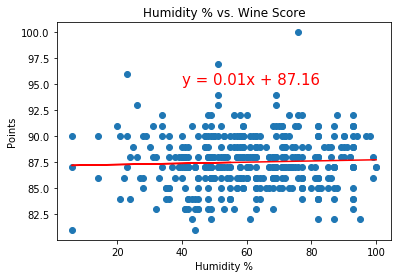

In [68]:
x_values = pd.to_numeric(wine_dedup["Humidity"]).astype(float)
y_values = pd.to_numeric(wine_dedup["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,95),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Points')
plt.title('Humidity % vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()

Regression line equation is: y = -0.06x + 90.57
The r-squared is: -0.27515596194144937
The regression displays no correlation between data sets.


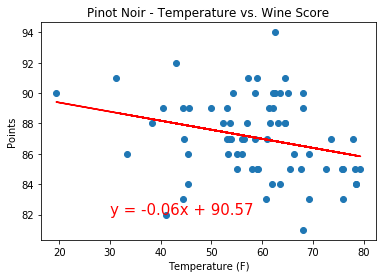

In [80]:
x_values = pd.to_numeric(pinot_noir["Temperature"]).astype(float)
y_values = pd.to_numeric(pinot_noir["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,82),fontsize=15,color="red")
plt.xlabel('Temperature (F)')
plt.ylabel('Points')
plt.title('Pinot Noir - Temperature vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()

Regression line equation is: y = 0.02x + 85.91
The r-squared is: 0.11413492943975664
The regression displays no correlation between data sets.


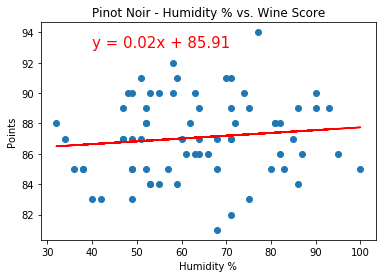

In [81]:
x_values = pd.to_numeric(pinot_noir["Humidity"]).astype(float)
y_values = pd.to_numeric(pinot_noir["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,93),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Points')
plt.title('Pinot Noir - Humidity % vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()

Regression line equation is: y = -0.07x + 91.04
The r-squared is: -0.21917734880657957
The regression displays no correlation between data sets.


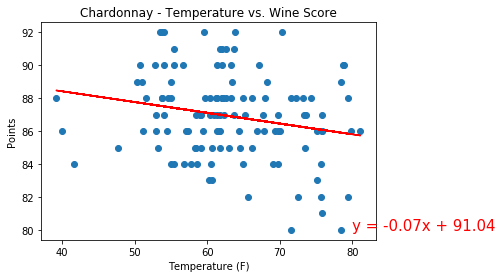

In [71]:
x_values = pd.to_numeric(chardonnay["Temperature"]).astype(float)
y_values = pd.to_numeric(chardonnay["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,80),fontsize=15,color="red")
plt.xlabel('Temperature (F)')
plt.ylabel('Points')
plt.title('Chardonnay - Temperature vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()

Regression line equation is: y = 0.03x + 85.33
The r-squared is: 0.19230509560705566
The regression displays no correlation between data sets.


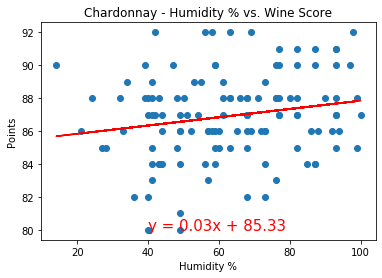

In [72]:
x_values = pd.to_numeric(chardonnay["Humidity"]).astype(float)
y_values = pd.to_numeric(chardonnay["points"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Points')
plt.title('Chardonnay - Humidity % vs. Wine Score')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation between data sets.")
plt.show()